<a href="https://colab.research.google.com/github/nicosaboonchi/data-analysis-projects/blob/main/e_Commerce_(Walmart).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy.stats import skew, kurtosis

## Data Import and Exploration

- User_ID: User ID
- Product_ID: Product ID
- Gender: Sex of User
- Age: Age in bins
- Occupation: Occupation(Masked)
- City_Category: Category of the City (A,B,C)
- StayInCurrentCityYears: Number of years stay in current city
- Marital_Status: Marital Status
- ProductCategory: Product Category (Masked)
- Purchase: Purchase Amount

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/walmart.csv")
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
print("Number of duplicated rows:", df.duplicated().sum())

Number of duplicated rows: 0


In [ ]:
df["Occupation"] = df["Occupation"].astype("object")
df["User_ID"] = df["User_ID"].astype("object")
df["Marital_Status"] = df["Marital_Status"].astype("object")
df["Product_Category"] = df["Product_Category"].astype("object")

df.dtypes

User_ID                       object
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

In [ ]:
cat_cols = ["Gender", "Age", "Occupation", "City_Category",
            "Stay_In_Current_City_Years", "Marital_Status",
            "Product_Category"]

for col in cat_cols:
  print(col, "\n", df[col].unique(), "\n")

Gender 
 ['F' 'M'] 

Age 
 ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25'] 

Occupation 
 [10 16 15 7 20 9 1 12 17 0 3 4 11 8 19 2 18 5 14 13 6] 

City_Category 
 ['A' 'C' 'B'] 

Stay_In_Current_City_Years 
 ['2' '4+' '3' '1' '0'] 

Marital_Status 
 [0 1] 

Product_Category 
 [3 1 12 8 5 4 2 6 14 11 13 15 7 16 18 10 17 9 20 19] 



## Data Cleaning

There isn't any data cleaning we need to do as of right now as our dataset is cleaned already.

All we did was convert some of the columns that were previously int values to categorical values which we did in the data exp portion so that we can get the unique values in each category.

In [ ]:
df["Gender"] = df["Gender"].replace({"M": "Male", "F": "Female"})
df["Marital_Status"] = df["Marital_Status"].replace({1: "Married", 0: "Not Married"})

## More Data Exploration


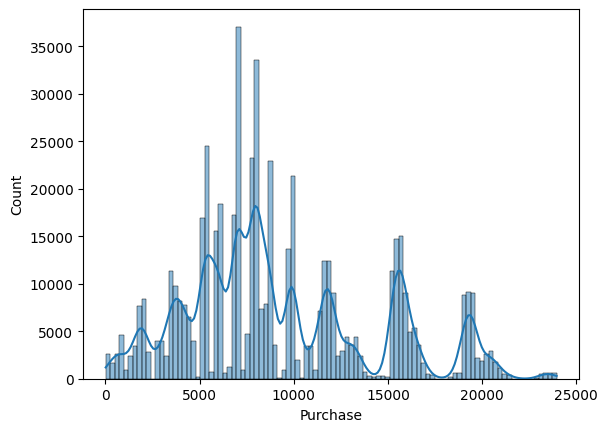

In [ ]:
sns.histplot(x="Purchase", data=df, bins=100, kde=True)
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

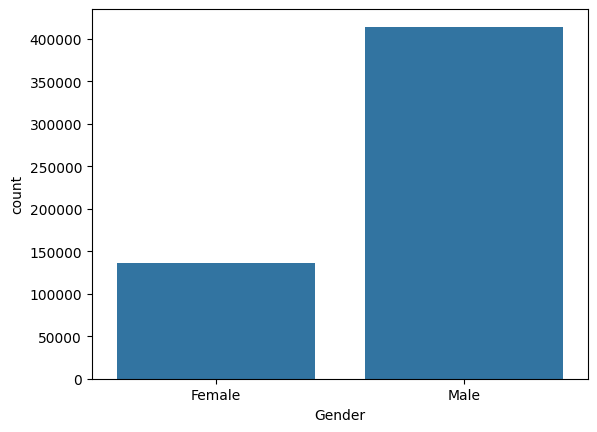

In [ ]:
sns.countplot(x="Gender", data=df)

<Axes: xlabel='Age', ylabel='count'>

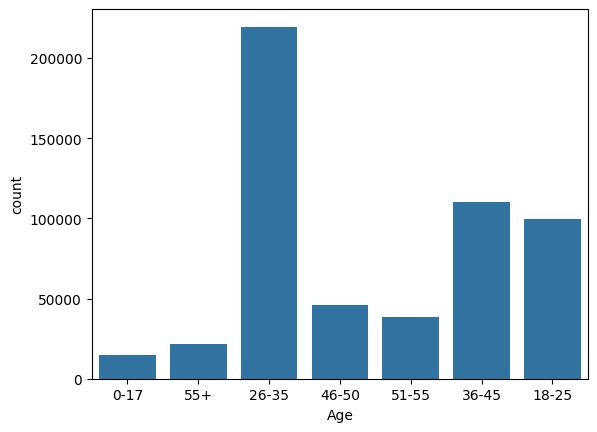

In [ ]:
sns.countplot(x="Age", data=df)

<Axes: xlabel='Occupation', ylabel='count'>

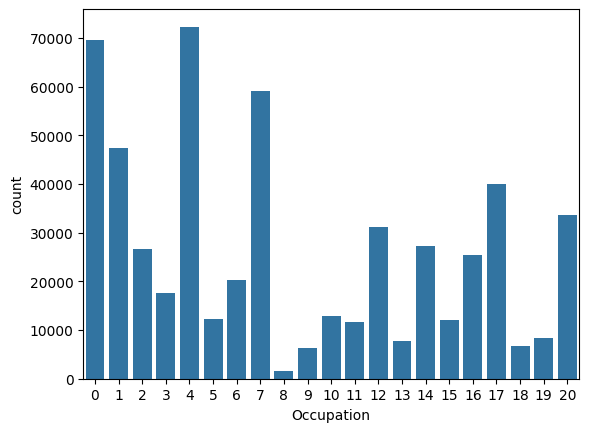

In [ ]:
sns.countplot(x="Occupation", data=df)

<Axes: xlabel='City_Category', ylabel='count'>

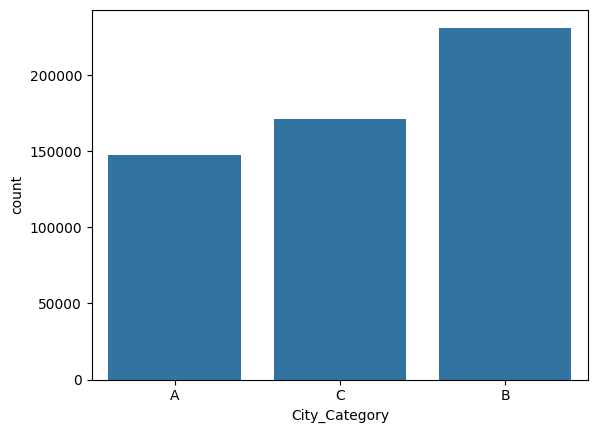

In [ ]:
sns.countplot(x="City_Category", data=df)

<Axes: xlabel='Product_Category', ylabel='count'>

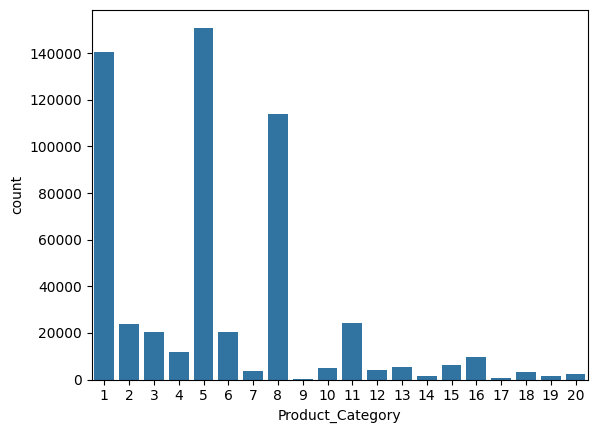

In [ ]:
sns.countplot(x="Product_Category", data=df)

How does the purchase amount vary by product category?

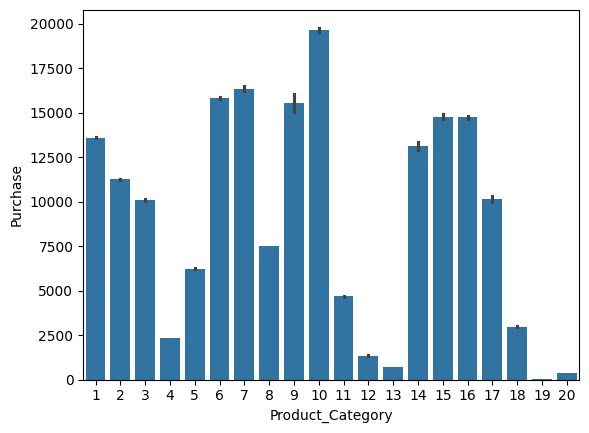

In [ ]:
sns.barplot(x="Product_Category", y="Purchase", data=df)
plt.show()

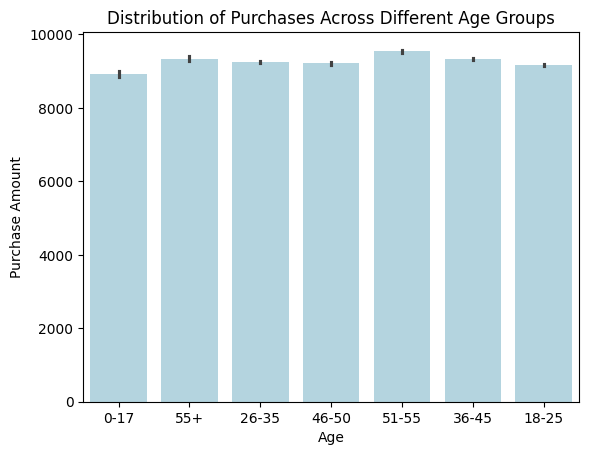

In [ ]:
sns.barplot(x="Age", y="Purchase", data=df, color="lightblue")
plt.title('Distribution of Purchases Across Different Age Groups')
plt.ylabel("Purchase Amount")
plt.show()

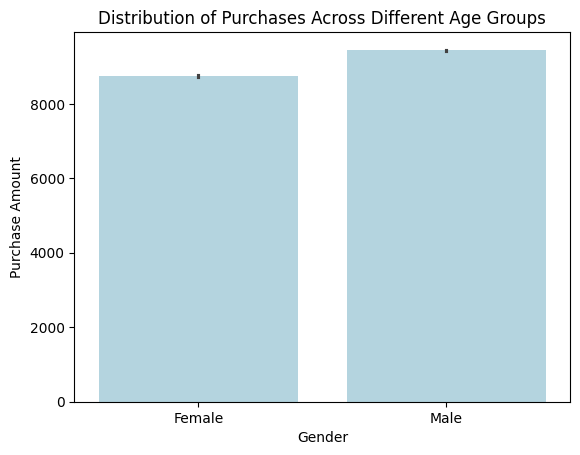

In [ ]:
sns.barplot(x="Gender", y="Purchase", data=df, color="lightblue")
plt.title('Distribution of Purchases Across Different Age Groups')
plt.ylabel("Purchase Amount")
plt.show()

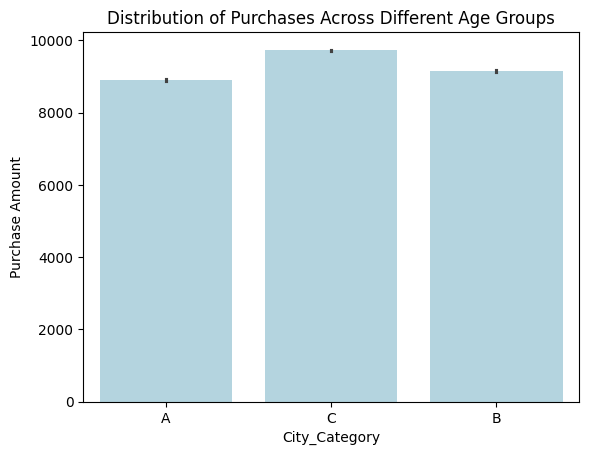

In [ ]:
sns.barplot(x="City_Category", y="Purchase", data=df, color="lightblue")
plt.title('Distribution of Purchases Across Different Age Groups')
plt.ylabel("Purchase Amount")
plt.show()

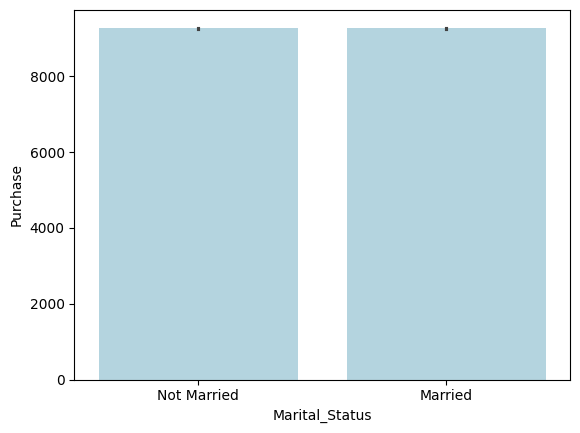

In [ ]:
sns.barplot(x="Marital_Status", y="Purchase", data=df, color="lightblue")
plt.show()

## Descriptive Statistics

In [ ]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [ ]:
df["Gender"].value_counts()

Gender
Male      414259
Female    135809
Name: count, dtype: int64

In [ ]:
df.groupby(by="Gender")["Purchase"].mean()

Gender
Female    8734.565765
Male      9437.526040
Name: Purchase, dtype: float64

In [ ]:
df.groupby(by="Marital_Status")["Purchase"].mean()

Marital_Status
Married        9261.174574
Not Married    9265.907619
Name: Purchase, dtype: float64

In [ ]:
# number of unique buyers
len(df["User_ID"].unique())

5891

In [ ]:
df2 = pd.DataFrame(df.groupby(by="User_ID").size())
df2

,0
User_ID,
1000001,35
1000002,77
1000003,29
1000004,14
1000005,106
...,...
1006036,514
1006037,122
1006038,12


In [ ]:
# total spent by each user
df3 = pd.DataFrame(df.groupby(by="User_ID")["Purchase"].sum()).sort_values(by="Purchase", ascending=False)
df3

,Purchase
User_ID,
1004277,10536909
1001680,8699596
1002909,7577756
1001941,6817493
1000424,6573609
...,...
1004991,52371
1005117,49668
1003883,49349


In [ ]:
indv_spending = pd.merge(df2, df3, on="User_ID")
indv_spending.rename(columns={0:"num_purchases", "Purchase": "total_purchase"},
                     inplace=True)
indv_spending

,num_purchases,total_purchase
User_ID,,
1000001,35,334093
1000002,77,810472
1000003,29,341635
1000004,14,206468
1000005,106,821001
...,...,...
1006036,514,4116058
1006037,122,1119538
1006038,12,90034


In [ ]:
round(indv_spending["num_purchases"].mean(),0).astype("int")

93

In [ ]:
indv_spending["total_purchase"].median()

521213.0

In [ ]:
round(indv_spending["total_purchase"].skew(),2)

2.43

In [ ]:
round(indv_spending["total_purchase"].kurtosis(),2)

8.54

In [ ]:
log_indv_spending = pd.DataFrame(np.log(indv_spending["total_purchase"]))

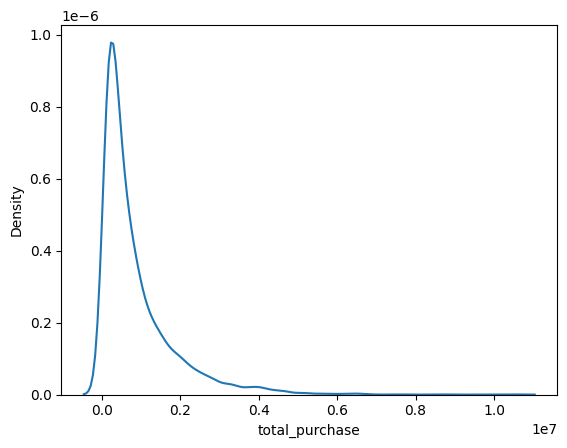

In [ ]:
sns.kdeplot(data=indv_spending, x="total_purchase")
plt.show()

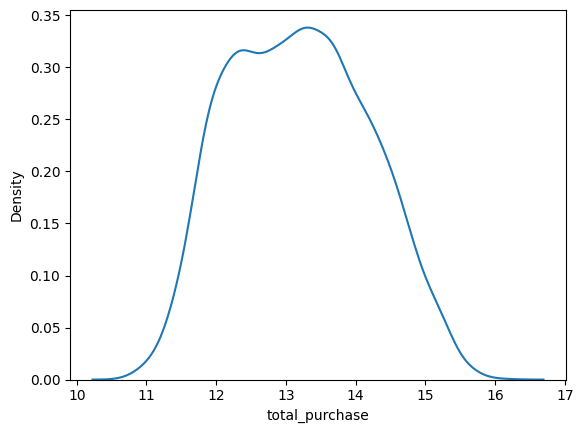

In [ ]:
sns.kdeplot(data=log_indv_spending, x="total_purchase")
plt.show()

In [ ]:
log_indv_spending.skew()

total_purchase    0.136524
dtype: float64

In [ ]:
log_indv_spending.kurtosis()

total_purchase   -0.755807
dtype: float64